In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_set = datasets.FashionMNIST('',download=True,train=True,transform=transforms.Compose([transforms.ToTensor()]))
test_set = datasets.FashionMNIST('',download=True,train=False,transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=20)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=60000)

In [4]:
images, labels = next(iter(train_loader))

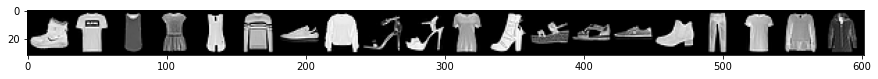

In [5]:
grid = torchvision.utils.make_grid(images,nrow=20)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)),cmap='gray')

In [6]:
class Network(nn.Module):
    def __init__(self,epochs=1):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=3,out_channels=12,kernel_size=5)
        self.fc1 = nn.Linear(in_features=12*4*4,out_features=180)
        self.fc2 = nn.Linear(in_features=180,out_features=90)
        self.fc3 = nn.Linear(in_features=90,out_features=30)
        self.out = nn.Linear(in_features=30,out_features=10)
    
    def forward(self,x):
        
        #input layer
        x = x
        
        #1st hidden layer
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x,kernel_size=2,stride=2)
        
        #2nd hidden layer
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x,kernel_size=2,stride=2)
        
        #4th hidden layer
        x = x.reshape(-1,12*4*4)
        x = self.fc1(x)
        x = F.relu(x)
        
        #5th hidden layer
        x = self.fc2(x)
        x = F.relu(x)
        
        #6th hidden layer
        x = self.fc3(x)
        x = F.relu(x)
        
        #output layer
        x = self.out(x)
        return x

In [7]:
model = Network()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
criterion = nn.CrossEntropyLoss()
epochs = 100

In [8]:
losses = []
for i in range(epochs):
    for j,(images,targets) in enumerate(train_loader):
        y_pred = model(images)
        loss = criterion(y_pred,targets.reshape(-1))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epochs: {i}, loss: {loss}')
    losses.append(loss)

Epochs: 0, loss: 0.4221333861351013
Epochs: 1, loss: 0.3405279219150543
Epochs: 2, loss: 0.3016349673271179
Epochs: 3, loss: 0.3001965880393982
Epochs: 4, loss: 0.2568875551223755
Epochs: 5, loss: 0.2642459273338318
Epochs: 6, loss: 0.24804744124412537
Epochs: 7, loss: 0.23118630051612854
Epochs: 8, loss: 0.2223438024520874
Epochs: 9, loss: 0.2316361367702484
Epochs: 10, loss: 0.24275049567222595
Epochs: 11, loss: 0.24767601490020752
Epochs: 12, loss: 0.23243562877178192
Epochs: 13, loss: 0.2356414794921875
Epochs: 14, loss: 0.18253053724765778
Epochs: 15, loss: 0.1695159673690796
Epochs: 16, loss: 0.13410721719264984
Epochs: 17, loss: 0.2180519849061966
Epochs: 18, loss: 0.272348552942276
Epochs: 19, loss: 0.16999654471874237
Epochs: 20, loss: 0.2128065526485443
Epochs: 21, loss: 0.1148269921541214
Epochs: 22, loss: 0.12730945646762848
Epochs: 23, loss: 0.16470374166965485
Epochs: 24, loss: 0.12406033277511597
Epochs: 25, loss: 0.2406574785709381
Epochs: 26, loss: 0.23374363780021667


In [9]:
x_test,y_test = next(iter(test_loader))
y_pred = (model(x_test).argmax(dim=1))

print(f'Accuracy: {(y_pred.eq(y_test).sum()/10000.).item()*100}%')

Accuracy: 87.84000277519226%


Text(0, 0.5, 'loss')

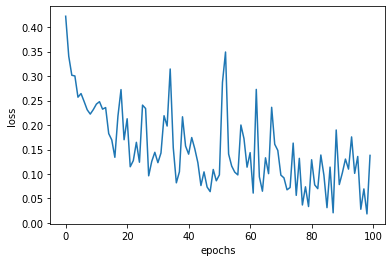

In [10]:
plt.plot(losses)
plt.xlabel('epochs')
plt.ylabel('loss')